# Binary Classcification

🔑 **Binary classification** :```It is a type of supervised learning in which a machine learning model is trained to predict one of two possible outcomes, usually represented as 0 or 1, true or false, positive, or negative, etc. The goal of binary classification is to separate the data into two classes or categories based on certain features or attributes of the data.```

🔨 **Example** :
* Spam vs. Not Spam: In email spam detection, 0 could represent "not spam," indicating that an email is legitimate, while 1 could represent "spam," indicating that an email is unwanted or unsolicited.

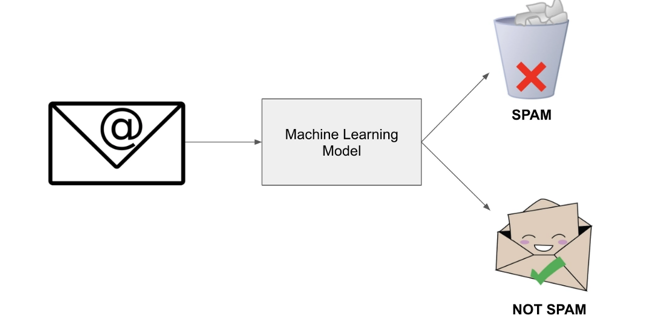

In [582]:
from sklearn.datasets import make_circles
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [583]:
X,y=make_circles(n_samples=10000,
               noise=0.03,
               random_state=42)

In [584]:
# Check the make moon dataset features and shape
print(f"There are {X.shape[0]} rows with {X.shape[1]} features")
print(f"The first 10 samples of dataset look likes: \n{X[:10,]}")

There are 10000 rows with 2 features
The first 10 samples of dataset look likes: 
[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]
 [-0.13392877  0.77624858]
 [ 0.77919743  0.64581132]
 [ 0.72295477  0.17383084]
 [-0.12180665  0.79695076]
 [ 0.84952936  0.50567829]]


In [585]:
# Check the make circles dataset target and shape
print(f"There are {y.shape[0]} rows with 2 binary target")
print(f"The first 10 samples of dataset look likes: \n{y[:10]}")

There are 10000 rows with 2 binary target
The first 10 samples of dataset look likes: 
[1 0 0 0 0 1 0 1 1 0]


In [586]:
# Create a dataframe to visualize data
moons=pd.DataFrame({'feature_0':X[:,0],'feature_1':X[:,1],'labels':y})
moons

,feature_0,feature_1,labels
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


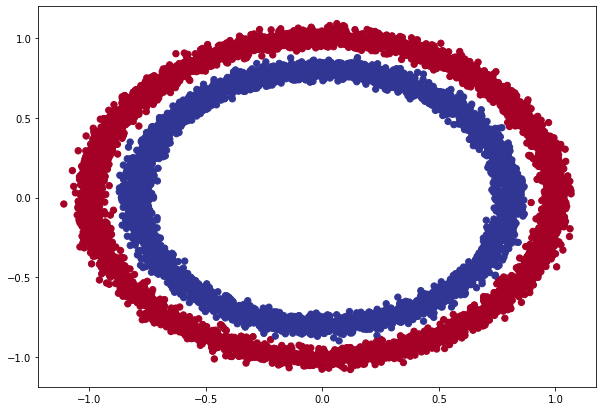

In [587]:
# Visualiing the data
plt.figure(figsize=(10,7))
plt.scatter(moons['feature_0'],moons['feature_1'],c=y,s=40,cmap=plt.cm.RdYlBu)

## Loss Used In BinaryClassification Problem

* ```Binary cross-entropy, also known as log loss, is a commonly used loss function in binary classification tasks. It measures the dissimilarity between the predicted probabilities and the true binary labels of the data. The binary cross-entropy loss is calculated using the following formula:```

<center><h4>Binary Cross-Entropy = -(y * log(p) + (1 - y) * log(1 - p))</h4></center>

* In this formula:
   * "y" represents the true binary label (0 or 1) of the data point.
   * "p" represents the predicted probability of the positive class (class 1) by the model.

In [588]:
# Example binary classification labels (0 or 1)
true_labels = [1, 0, 1, 1, 0]

# Example predicted probabilities for the positive class
predicted_probs = [0.8, 0.2, 0.6, 0.9, 0.3]

# Convert the true labels and predicted probabilities to TensorFlow tensors
true_labels_tensor = tf.constant(true_labels, dtype=tf.float32)
predicted_probs_tensor = tf.constant(predicted_probs, dtype=tf.float32)

# Calculate the binary cross-entropy loss
bce_loss = tf.keras.losses.BinaryCrossentropy()(true_labels_tensor, predicted_probs_tensor)

# Print the calculated loss
print("Binary Cross-Entropy Loss:", bce_loss.numpy())

Binary Cross-Entropy Loss: 0.28382948


## Neural Network With Linear Activation

🔑 **Linear Activation**: ```It is also known as the identity function, is a simple activation function that computes a weighted sum of the inputs without applying any non-linear transformation. Mathematically, the output of a linear activation function can be represented as:```
                                                   <center><h3>f(x) = x<h3></center>

In [589]:
# Create a toy tensor (similar to the data we pass into our models)

A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

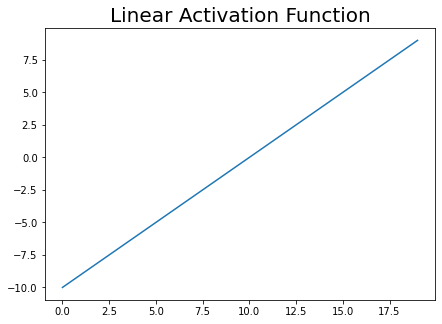

In [590]:
plt.figure(figsize=(7,5))
plt.plot(tf.keras.activations.linear(A))
plt.title("Linear Activation Function",fontdict={'size':20})
plt.show()

### Train Test Spliting Data

In [591]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

### Create A Neural Network With Linear Activation

![Binary Classification Linear.png](<attachment:Binary Classification Linear.png>)
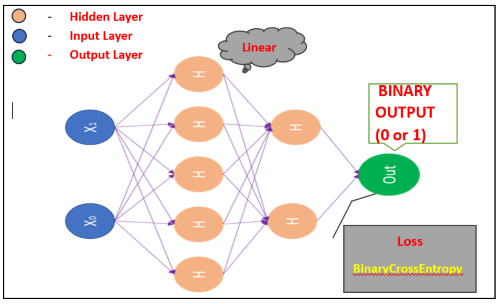

#### Some Important Parameters In Compilation
**Terms**|**Meaning**
-----|-------
**validation_split**|This randomly split data of which one set is used for training and other for testing.
**epochs**|How many times the model will go through the entire training dataset.
**verbose**|Show training if set 1 and will not show it if set 0.

In [592]:
# Set the seed for reproducibility of output
tf.random.set_seed(42)

# 1.Create a model
model_linear=tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=[2]),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_linear.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

# 3.Fit the model
history_linear=model_linear.fit(X_train,y_train,validation_split=0.15,epochs=100,verbose=0)

### Loss Accuracy Curve Function

In [593]:
def plot_loss_accuracy_curve(history):
    '''Take history variable and plot loss and accuracy curve'''
    # Creating a subplot

    fig,ax=plt.subplots(1,2,figsize=(10,7))
    fig.subplots_adjust(right=2) # Set left padding in graph
    ax=ax.ravel()

    # This is for plotting loss curve and lowest accuracy on training data

    pd.DataFrame({'Loss':history.history['loss'],'Val_Loss':history.history['val_loss']}).\
        plot(title='Loss',ax=ax[0]) # Plot loss curve

    ax[0].text(len(history.history['loss']),history.history['loss'][-1], # Annotate lowest accuracy
               'Min Loss:{}'.format(round(history.history['loss'][-1],2)),
               fontdict={'size':15})
    
    # This is for plotting accuracy curve and highest accuracy on training data

    pd.DataFrame({'Accuracy':history.history['accuracy'],'Val_Accuracy':history.history['val_accuracy']})\
        .plot(title='Accuracy',ax=ax[1]) # Plot accuracy curve

    ax[1].text(len(history.history['accuracy']),history.history['accuracy'][-1], # Annotate Highest Accuracy
               'Max Acc: {}'.format(round(history.history['accuracy'][-1],2)),
               fontdict={'size':15})
    plt.show() # Show plot

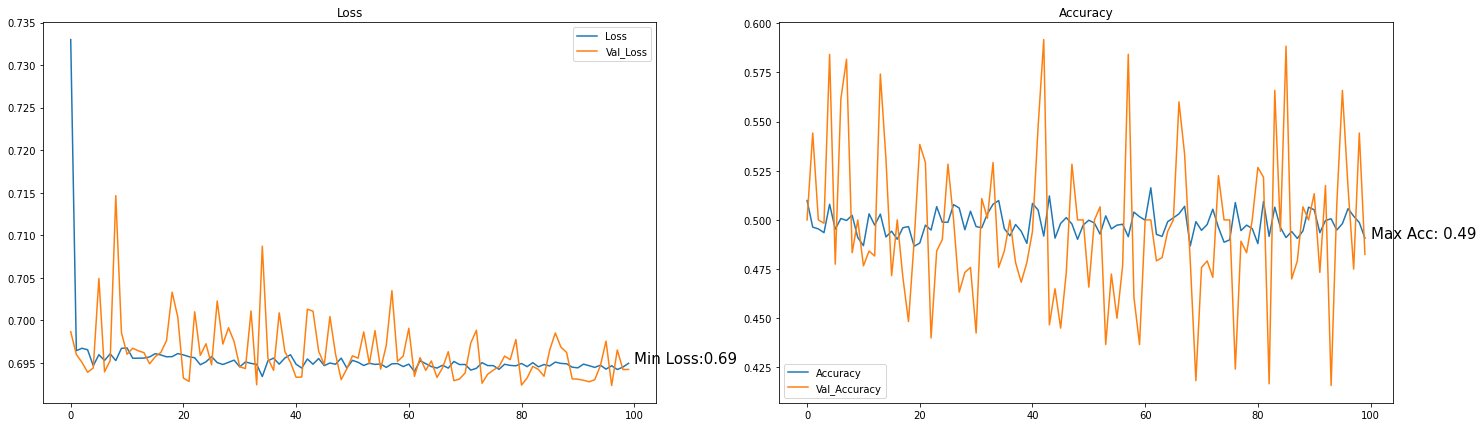

In [594]:
plot_loss_accuracy_curve(history=history_linear)

### Evaluate Model On Testing Data

In [595]:
model_linear.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4970


[0.6935529112815857, 0.4970000088214874]

## Function To Visualize The Sepration Of Data

In [596]:
import numpy as np
def plot_decision_boundry(model,X,y):
  """
  Plots the decision boundry created by a model predicting on X
  """
  # Define the axis boundries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  # Create X value (we're going to make prediction on these)
  x_in=np.c_[xx.ravel(),yy.ravel()] # Stack 2D arrays togathere

  # Make prediction
  y_pred=model.predict(x_in)

  # Check for muti-class
  if len(y_pred[0])>1:
    print('doing multiclass calssification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred=np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundry
  plt.figure(figsize=(10,7))
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


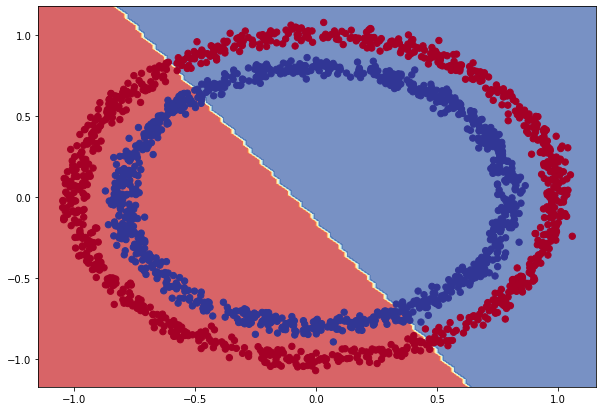

In [597]:
plot_decision_boundry(model=model_linear,X=X_test,y=y_test)

## Neural Network With Non-Linear Activation

## Hidden Layer Activation Functions (Non-Linear)

### Relu(Rectified Linear Unit)
* It is a popular non-linear activation function commonly used in neural networks. It introduces non-linearity by outputting the input directly if it is positive, and zero otherwise. Mathematically, the ReLU activation function can be defined as:

<center><h3>f(x) = max(0, x)</h3></center>

In [598]:
def relu(a):
    return tf.maximum(0,a)

In [599]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

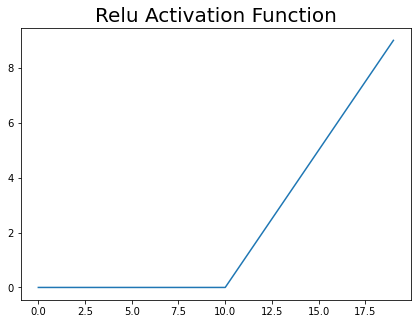

In [600]:
plt.figure(figsize=(7,5))
plt.plot(relu(A))
plt.title("Relu Activation Function",fontdict={'size':20})
plt.show()

## Output Layer Activation Functions (Non-Linear)

### Sigmoid
*  Sigmoid is a popular activation function used in neural networks. It is a smooth, S-shaped function that maps the input to a value between 0 and 1. Mathematically, the sigmoid activation function can be defined as:

<center><h3>f(x) = 1 / (1 + e^(-x))<h3></center>

🔑 **Note**: 
* Because of the vanishing gradient problem, sigmoid activations are not commonly used in hidden layers of deep neural networks. However, they are still used in the output layer of binary classification tasks, where the goal is to predict a probability or make a binary decision.

In [601]:
def sigmoid(a):
    return (1/(1+tf.math.exp(-a)))

In [602]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

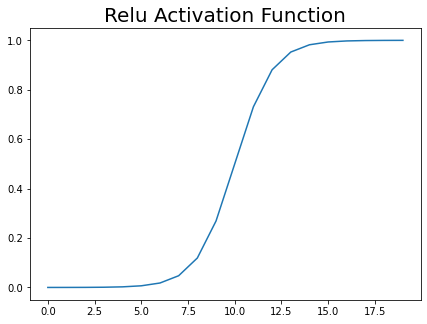

In [603]:
plt.figure(figsize=(7,5))
plt.plot(sigmoid(A))
plt.title("Relu Activation Function",fontdict={'size':20})
plt.show()

### Create A Neural Network With Linear Activation

#### 1) Model_Non_Linear (Only with non-linear Hidden Activation) And Optimizer Adam

![Binary Classification.png](<attachment:Binary Classification.png>)
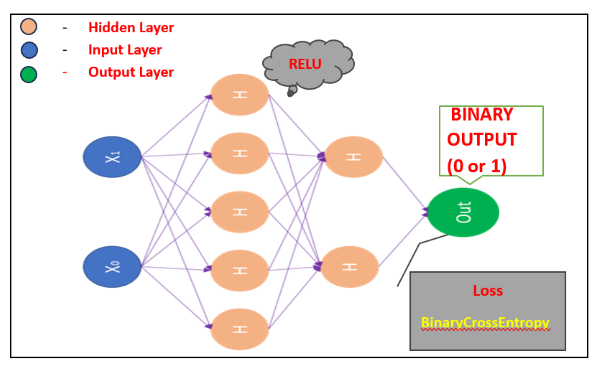

In [604]:
# Set seed for result reproducibility
tf.random.set_seed(42)

# 1. Create model
model_non_linear_hidd=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=[2]),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
model_non_linear_hidd.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=['accuracy'])

# 3. Fit the model
history_non_linear_hidd=model_non_linear_hidd.fit(X_train,y_train,validation_split=0.15,epochs=50,verbose=0)

#### Evaluate Model On Testing Data

In [605]:
model_non_linear_hidd.evaluate(X_test,y_test)

 1/63 [..............................] - ETA: 2s - loss: 0.0309 - accuracy: 1.0000

63/63 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9755


[0.06244950741529465, 0.9754999876022339]

#### Loss And Accuracy Curves

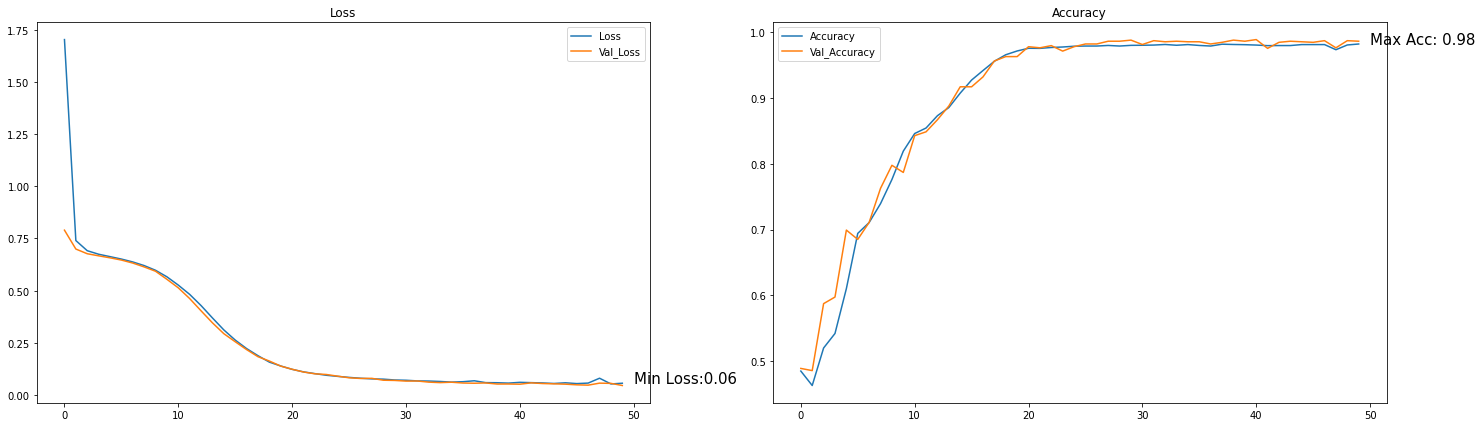

In [606]:
plot_loss_accuracy_curve(history_non_linear_hidd)

#### Checking From Sepration Boundry

313/313 [==============================] - 0s 864us/step
doing binary classification


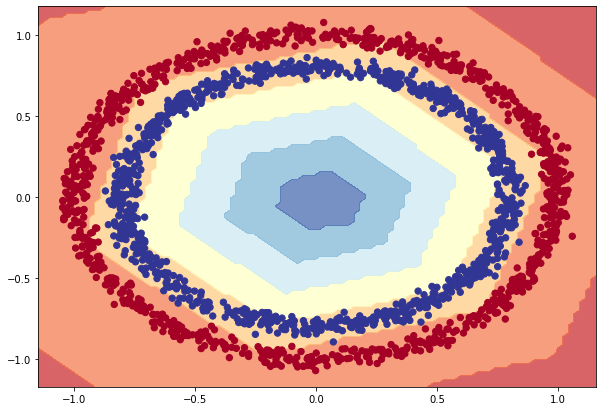

In [607]:
plot_decision_boundry(model=model_non_linear_hidd,X=X_test,y=y_test)

#### 2) Model_Non_Linear (Only with non-linear Hidden Activation+Output Activation) And Optimizer Adam

![Binary Classification Linear Output Activation.png](<attachment:Binary Classification Linear Output Activation.png>)
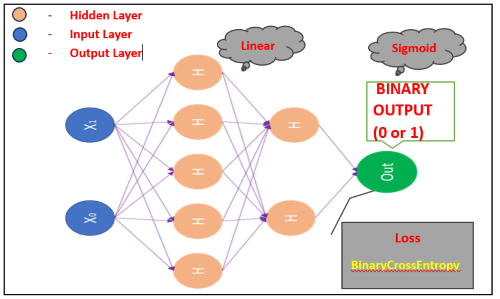

In [608]:
# Set seed for result reproducibility
tf.random.set_seed(42)

# 1. Create model
model_non_linear=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=[2]),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile Model
model_non_linear.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=['accuracy'])

# 3. Fit the model
history_non_linear=model_non_linear.fit(X_train,y_train,validation_split=0.15,epochs=50,verbose=0)

#### Evaluate Model On Testing Data

In [609]:
model_non_linear.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9790


[0.06214507296681404, 0.9789999723434448]

#### Loss And Accuracy Curves

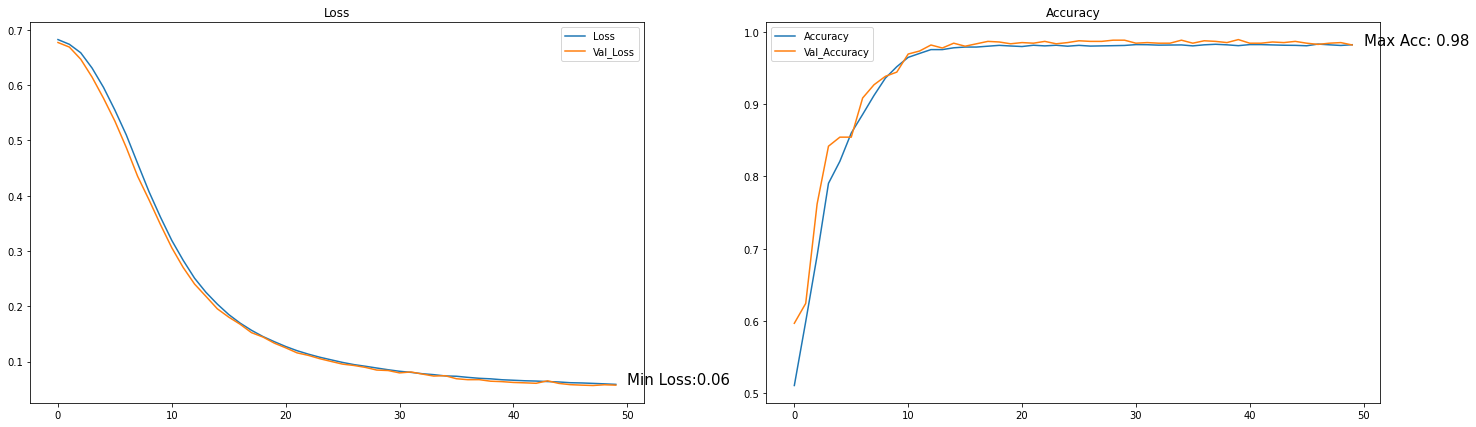

In [610]:
plot_loss_accuracy_curve(history=history_non_linear)

#### Checking From Sepration Boundry

313/313 [==============================] - 0s 994us/step
doing binary classification


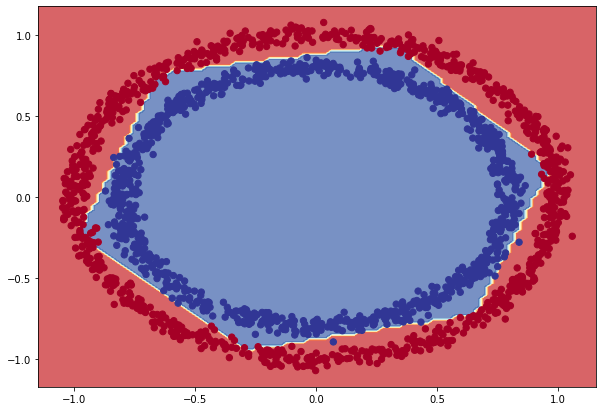

In [611]:
plot_decision_boundry(model=model_non_linear,
                      X=X_test,
                      y=y_test)

## More classification evaluation methods

Alongside to visualizing our models results as much as possible,
there are a handful of the other classification evaluation methods
& metrics you should be familiar with.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [612]:
# Check the accuracy of our model
loss,accuracy=model_non_linear.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

63/63 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9790
Model loss on the test set: 0.06214507296681404
Model accuracy on the test set: 97.90%


In [613]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=tf.round(model_non_linear.predict(X_test))
confusion_matrix(y_test,y_pred)

63/63 [==============================] - 0s 1ms/step


array([[ 958,   36],
       [   6, 1000]], dtype=int64)

## How about a confusion matrix.

In [614]:
from sklearn.metrics import confusion_matrix
y_pred=model_non_linear.predict(X_test)

63/63 [==============================] - 0s 776us/step


## How about we pretify our confusion matrix

In [649]:
import seaborn as sns
def plot_confusion_matrix(y_test,y_pred,figsize,classes):
    plt.figure(figsize=figsize)
    plt.title('Confusion Matrix')
    # Check for muti-class
    if y_pred.shape[1]>1:
        print('doing multiclass calssification')
        # We have to reshape our prediction to get them ready for plotting
        n=y_pred.shape[1]
        y_pred=np.argmax(y_pred,axis=1)
        cf_matrix=confusion_matrix(y_test,y_pred) # Create a confusion matrix
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()] # Creates a flatten array of group count
        group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix,axis=1)[0]]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(n,n)
    else:
        print('doing binary classification')
        y_pred=np.round(y_pred)
        cf_matrix=confusion_matrix(y_test,y_pred) # Create a confusion matrix
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()] # Creates a flatten array of group count
        group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(y_pred.shape[1]+1,-1)
    sns.heatmap(cf_matrix, annot=labels,xticklabels=classes,yticklabels=classes,fmt='', cmap=plt.cm.Blues_r)
    plt.show()

doing binary classification


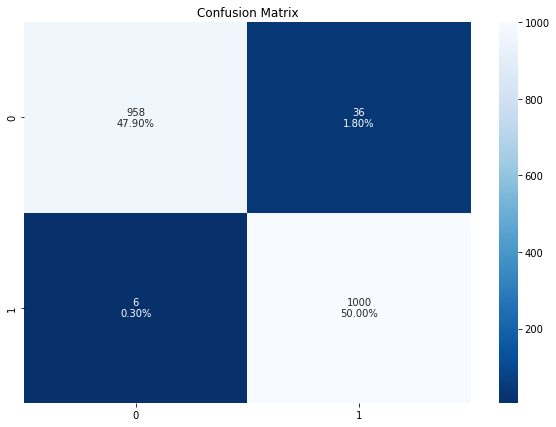

In [650]:
plot_confusion_matrix(y_test,y_pred,figsize=(10,7),classes=['0','1'])

# Conclusion of Binary Classification

* As we can see that if we try to solve complex problem of classification without non-linear activation then the model_linear performed worst also to note real world problem are complex

* As we apply non-linear activation to hidden layers in model we can see that it start shaping upon the data,

* And lastly when we appied non-linear activation to both hidden and output layer gave ous the best reults i,e model_non_linear/;

# Multiclass Classification
🔑 **Multiclass classification** :```Multiclass classification is a type of classification problem  in  machine learning where the goal is to classify instances into more than two classes. In multiclass classification, each instance belongs to one of the several predefined classes, and the model must predict the correct class label for each new instance.```

🔨 **Example** :

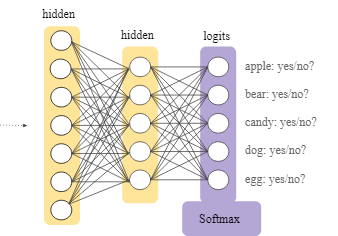

In [617]:
import tensorflow as tf
(x_train_mul,y_train_mul),(x_test_mul,y_test_mul)=tf.keras.datasets.fashion_mnist.load_data()

In [618]:
# Check the make moon dataset features and shape
print(f"There are {x_train_mul.shape[0]} rows with {x_train_mul.shape[1]} features")
print(f"The first sample of dataset look likes: \n{x_train_mul[0]}")

There are 60000 rows with 28 features
The first sample of dataset look likes: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 14

In [619]:
# Check the make moon dataset target and shape
print(f"There are {y_train.shape[0]} rows with {np.unique(y_train).shape[0]} target")
print(f"The first 10 samples of dataset look likes: \n{y_train[:10].ravel()}")

There are 8000 rows with 2 target
The first 10 samples of dataset look likes: 
[0 0 1 1 1 0 0 0 0 0]


In [620]:
# Create a small list so we can index on to our training labels so they're human redable
class_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
len(class_labels)

10

## Visualizing Data

In [621]:
# This function will help ous to create visualization of images
def plot_images(images,labels,classes):
    '''
    This function will help ous to visualize the images in dataset
    '''
    fig,ax=plt.subplots(2,2,figsize=(10,7)) # Creatin a plot wit 1 row and 10 columns
    ax=ax.ravel() # Flattening the axis array
    for i in range(0,4):
        image=images[i] # Getting Image Data
        label=int(labels[i]) # Converting Image labels from float to int
        ax[i].imshow(image) # Showing Image
        ax[i].set_title(classes[label],fontdict={'size':20}) # Setting title as class labels
        ax[i].axis(False) # Removing the scale axis

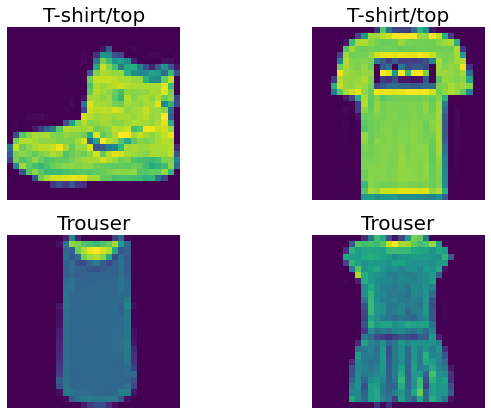

In [622]:
plot_images(x_train,y_train,class_labels)

## Creating Model For Muticlass Classification

### 1) model_multi_no_one_hot:
* If the labels are not one-hot encode i.e in the form

In [623]:
y_train_mul

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

🔑 **Note**: If the labels are not one-hot encoded we will use the loss as ```SparseCategoricalCrossentropy```.

**SparseCategoricalCrossentropy**:
* ```SparseCategoricalCrossentropy is a loss function used for multi-class classification tasks when the true labels are provided as integers rather than one-hot encoded vectors. It calculates the cross-entropy loss between the predicted class probabilities and the true class labels.```

* The formula for the SparseCategoricalCrossentropy loss function can be expressed as follows:

<center><h4>SparseCategoricalCrossentropy = - Σ [y_true * log(y_pred)]<h4></center>

* In this formula:
   * y_true represents the true class labels provided as integers.
   * y_pred represents the predicted class probabilities output by the model.

In [624]:

# Example true labels (not one-hot encoded)
true_labels = [2, 0, 1, 1, 2]

# Example predicted class probabilities
predicted_probs = [[0.1, 0.2, 0.7],
                   [0.8, 0.1, 0.1],
                   [0.3, 0.6, 0.1],
                   [0.2, 0.7, 0.1],
                   [0.05, 0.05, 0.9]]

# Convert the true labels and predicted probabilities to TensorFlow tensors
true_labels_tensor = tf.constant(true_labels, dtype=tf.int32)
predicted_probs_tensor = tf.constant(predicted_probs, dtype=tf.float32)

# Calculate the sparse categorical cross-entropy loss
sparse_ce_loss = tf.keras.losses.SparseCategoricalCrossentropy()(true_labels_tensor, predicted_probs_tensor)

# Print the calculated loss
print("Sparse Categorical Cross-Entropy Loss:", sparse_ce_loss.numpy())

Sparse Categorical Cross-Entropy Loss: 0.3105359


### Output Activation In Classification Problem
* As we used sigmoid function on binary classification.
* But in muticlass classification we use ```SOFTMAX```

### SOFTMAX:
* ```The softmax function is commonly used as an activation function in the output layer for multiclass classification problems. It is applied to the logits (unnormalized scores) produced by the previous layers of the network to convert them into a probability distribution over the classes.```

* When softmax is used as the activation function in the output layer, it ensures that the output values are non-negative and sum up to 1, making them interpretable as class probabilities. Each output value represents the estimated probability of the corresponding class.
Mathematically, the softmax function applied to a vector of logits can be expressed as follows:

<center><h4>softmax(z_i) = exp(z_i) / sum(exp(z_j))<h4></center>

* where z_i represents the i-th element of the input vector.

In [625]:
def softmax(logits):
    exp_logits = tf.math.exp(logits)
    sum_exp_logits = tf.reduce_sum(exp_logits)
    softmax_output = exp_logits / sum_exp_logits
    return softmax_output

# Example logits (unnormalized scores)
logits = [2.0, 1.0, 0.1]

# Apply softmax using the custom softmax function
softmax_output = softmax(logits)

# Print the softmax output
print("Softmax Output:", softmax_output)

Softmax Output: tf.Tensor([0.6590011  0.24243295 0.09856589], shape=(3,), dtype=float32)


### Adding A Flattening Layer As Input Shape (28,28)
#### Before Using Flatten Layer

In [626]:
# Create a sample input tensor representing a batch of 2D images
input_tensor = x_train_mul

# Create a model
model_flatten= tf.keras.Sequential()

# Add a Flatten layer
model_flatten.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Check the shape before and after the Flatten layer
print("Shape before Flatten:", input_tensor.shape)
print("Shape after Flatten:", model_flatten(input_tensor).shape)

Shape before Flatten: (60000, 28, 28)
Shape after Flatten: (60000, 784)


In [629]:
# Set the seed
tf.random.set_seed(42)

# 1.Create a model
model_multi_no_one_hot=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(len(class_labels),activation='softmax')
]
)

# 2.Compile the model
model_multi_no_one_hot.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=['accuracy'])

# 3.Train model
history_multi_no_one_hot=model_multi_no_one_hot.fit(x_train_mul,
                                                    y_train_mul,
                                                    validation_split=0.15,
                                                    epochs=40,
                                                    verbose=0)

#### Evaluate Model On Testing Data

In [630]:
model_multi_no_one_hot.evaluate(x_test_mul,y_test_mul)

313/313 [==============================] - 0s 1ms/step - loss: 2.3025 - accuracy: 0.1001


[2.302459239959717, 0.10010000318288803]

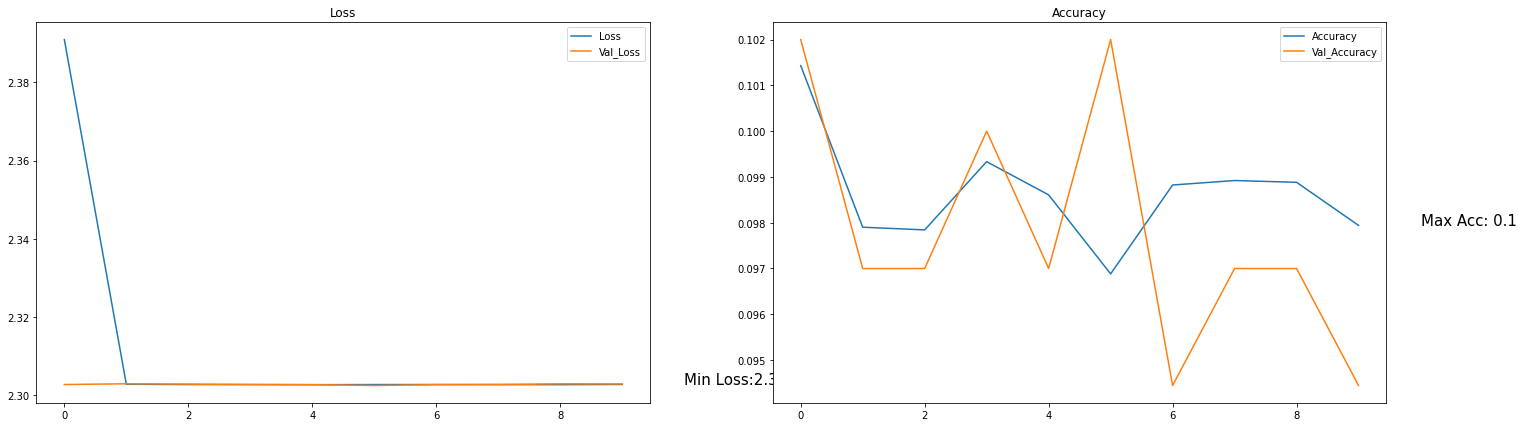

In [631]:
plot_loss_accuracy_curve(history_multi_no_one_hot)

### 2) model_multi_one_hot
* If the data in form of of one hot encoding as follow:

In [632]:
# Creating one-hot encoding
tf.one_hot([1,2,3,4],depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]], dtype=float32)>

🔑 **Note**: If the labels are one-hot encoded we will use the loss as ```CategoricalCrossentropy```.

**CategoricalCrossentropy**:
* ```Categorical CrossEntropy is a loss function commonly used in multiclass classification problems where the true labels are represented as one-hot encoded vectors. It measures the dissimilarity between the predicted class probabilities and the true class labels.```

* The formula for the CategoricalCrossentropy loss function can be expressed as follows:

<center><h4>Categorical CrossEntropy = - Σ(y_i * log(p_i))<h4></center>

* In this formula:
   * Σ represents the summation over all classes.
   * y_i represents the true label (1 or 0) for class i.
   * p_i represents the predicted probability for class i.

In [633]:
# Set the seed
tf.random.set_seed(42)

# 1.Create a model
model_multi_one_hot=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(len(class_labels),activation='softmax')
]
)

# 2.Compile the model
model_multi_one_hot.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=['accuracy'])

# 3.Train model
history_multi_one_hot=model_multi_one_hot.fit(x_train_mul,
                                                 tf.one_hot(y_train_mul,depth=len(class_labels))
                                                ,validation_split=0.15,
                                                epochs=40,
                                                verbose=0)

#### Evaluate Model On Testing Data

In [652]:
model_multi_one_hot.evaluate(x_test_mul,tf.one_hot(y_test_mul,depth=len(class_labels)))

  1/313 [..............................] - ETA: 8s - loss: 1.7528 - accuracy: 0.2188

313/313 [==============================] - 1s 2ms/step - loss: 1.6499 - accuracy: 0.2996


[1.6499435901641846, 0.2996000051498413]

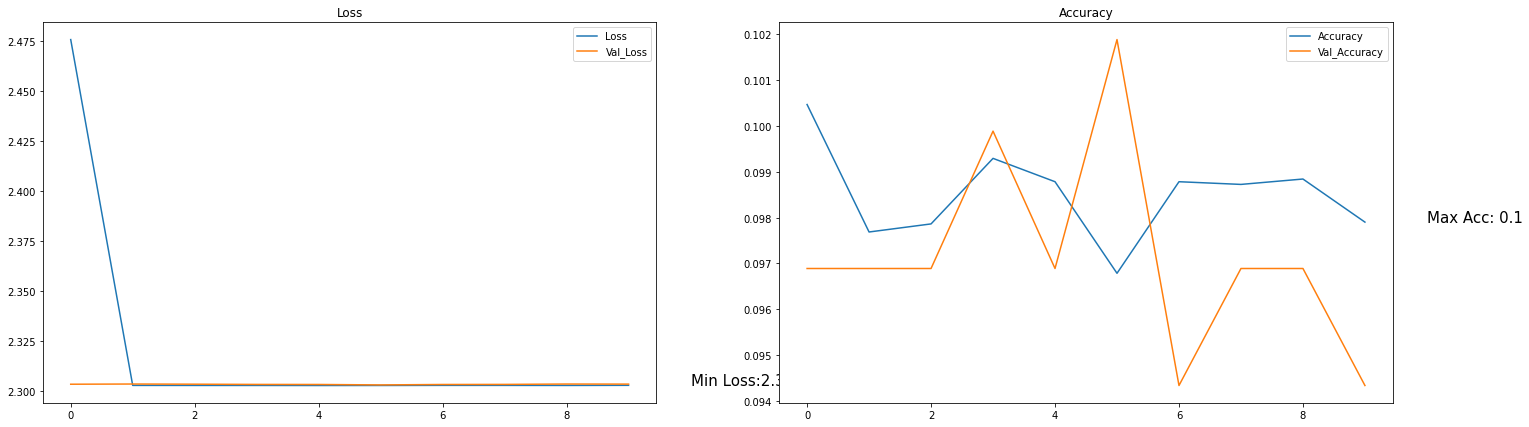

In [ ]:
plot_loss_accuracy_curve(history_multi_one_hot)

### 3) model_muti_norm
* When we will normalize data before fedding to neural network

In [ ]:
x_train_norm=x_train_mul/255.0
x_test_norm=x_test_mul/255.0

In [ ]:
# Set the seed
tf.random.set_seed(42)

# 1.Create a model
model_multi_norm=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(len(class_labels),activation='softmax')
]
)

# 2.Compile the model
model_multi_norm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                               metrics=['accuracy'])

# 3.Train model
histor_multi_norm=model_multi_norm.fit(x_train_norm,
                                                 tf.one_hot(y_train,depth=len(class_labels))
                                                ,validation_split=0.15,
                                                epochs=20,
                                                verbose=0)

#### Evaluate Model On Testing Data

In [ ]:
model_multi_one_hot.evaluate(x_test_mul,tf.one_hot(y_test_mul,depth=len(class_labels)))

313/313 [==============================] - 0s 1ms/step - loss: 2.3032 - accuracy: 0.1000


[2.3031954765319824, 0.10000000149011612]

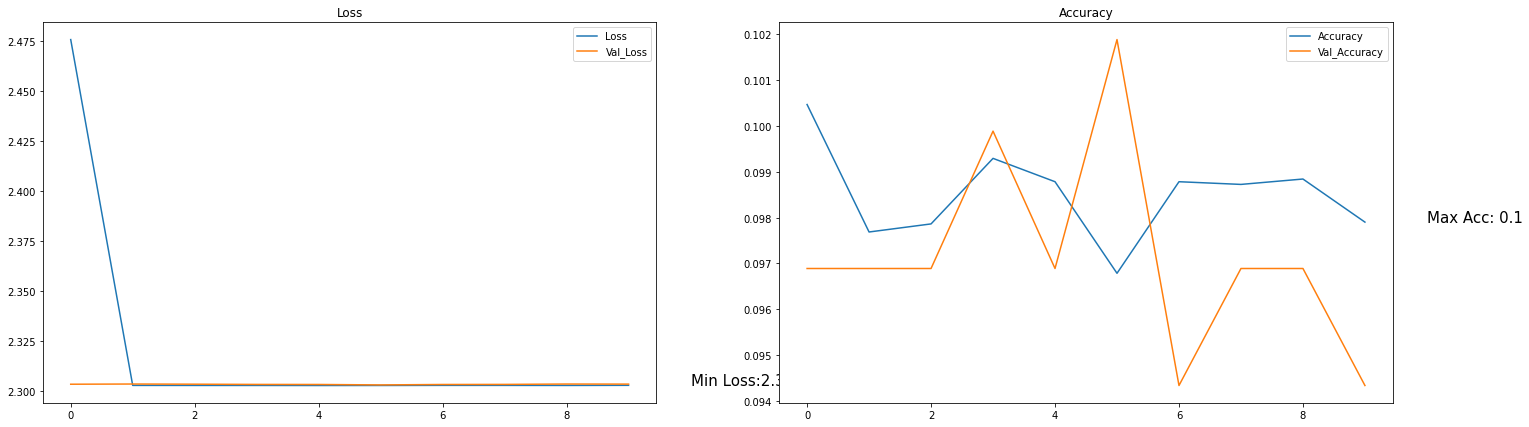

In [ ]:
plot_loss_accuracy_curve(history_multi_one_hot)

#### Confusion Matrix

313/313 [==============================] - 0s 1ms/step
doing multiclass calssification


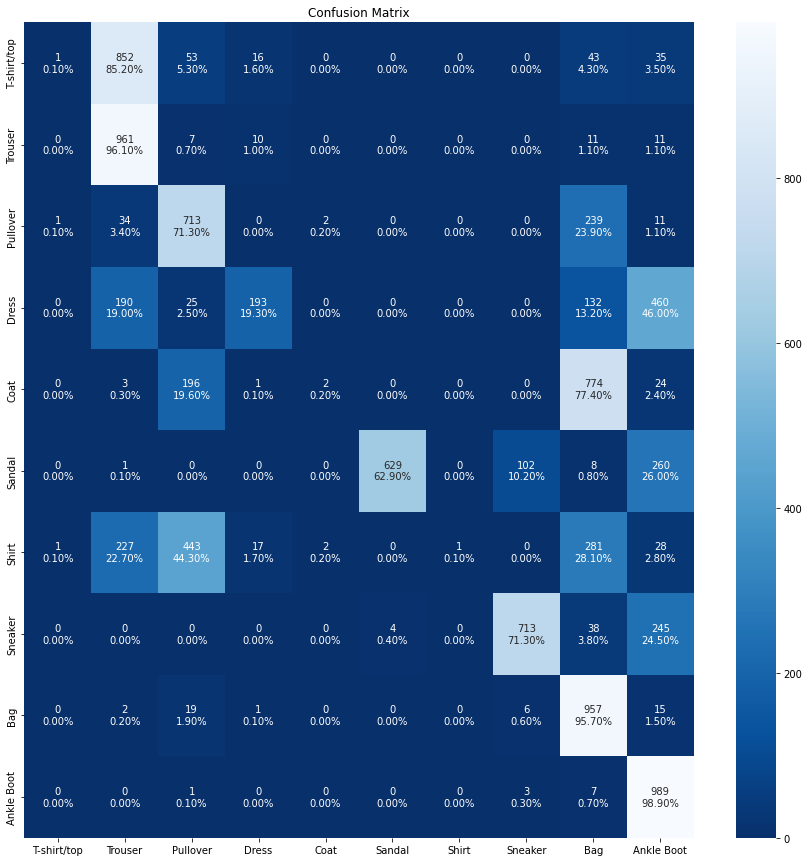

In [651]:
y_pred_mul=model_multi_norm.predict(x_test_mul)
plot_confusion_matrix(y_test_mul,y_pred_mul,figsize=(15,15),classes=class_labels)

# Conclusion of Muticlass Classification

* As we can see in both the model with not one hot encoded and one-hot encoded we can see that model trained with normalized data get the best accuracy with least epochs.

```Thus we can say that model_muli_norm was beats```